In [2]:
# https://medium.com/data-hackers/engenharia-de-features-transformando-dados-categ%C3%B3ricos-em-dados-num%C3%A9ricos-e5d3991df715

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import matthews_corrcoef, make_scorer, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

In [4]:
df = pd.read_csv("train.csv") 
# apagando colunas que não auxiliam na predição
df = df.drop(["ano", "sequencial_candidato", "nome"], axis=1)
# lidando com as variaveis categoricas
df = pd.get_dummies(df, columns = ["uf", "partido", "cargo", "sexo", "grau", "estado_civil", "ocupacao"]) 
# separando dados de treino e teste
train, test = train_test_split(df, train_size=0.8) # separação entre treino e teste  

train_y = train[["situacao"]]
train_X = train.drop(["situacao"], axis = 1)

test_y = test[["situacao"]]
test_X = test.drop(["situacao"], axis = 1)

le = LabelEncoder()
le.fit(train_y.situacao)
train_y = le.transform(train_y.situacao)

le = LabelEncoder()
le.fit(test_y.situacao)
test_y = le.transform(test_y.situacao)

In [5]:
df.groupby("situacao").size()

situacao
eleito        1026
nao_eleito    6596
dtype: int64

nao_eleito    6596
eleito        1026
Name: situacao, dtype: int64

Eleitos representam 0.0000% do dataset.



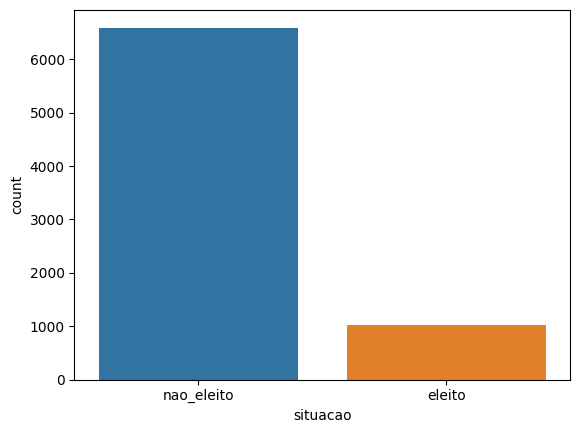

In [18]:
print(df.situacao.value_counts())
print("\nEleitos representam {:.4f}% do dataset.\n".format((df[df.situacao == "eleitos"].shape[0] / df.shape[0]) * 100))
# plotar gráfico de barras para as Classes
sns.countplot(df,x = 'situacao');

P: Há desbalanceamento das classes (isto é, uma classe tem muito mais instâncias que outra)? 

R: Sim, Temos um dataset desbalanceado com mais classes do tipo "não eleito". mais ou menos 5 para 1, do que para o "eleito".

P: Em que proporção? 

R: Mais de 5 para 1, (eleito 1026 e nao_eleito 6596) ou seja a cada 1 eleito temos quase 6 não eleitos.

P: Quais efeitos colaterais o desbalanceamento de classes pode causar no classificador?

R: Alguns algoritmos de ML tem dificuldade em em induzir um bom modelo a partir de conjutos de dados desbalanceados. Se classificarmos com dados da classe desbalanceados, os algoritmos podem não diferenciar  a classe minoritária das demais categorias, acreditando que estão agregando resultado devido à aparente alta acurácia. Essa falta de diferenciação pode ocasionar problemas visto que geralmente a classe minoritária é o cerne da questão, como no nosso caso, quem foi eleito.

P: Como você poderia tratar isso? (10 pt.)

R: Pode ser utilizado as técnicas de "Reestruturação dos dados". Dentro das ténicas de "Reestruturação de dados" pode ser feito o "Undersamplig", que é reduzir a distribuição dos dados das observações da classe majoritária, para tentar igualar a quantidade. Isso pode ser feito com "Random Undersamplig", que é a retirada aleatória de observações da classe majoritária, ou "Fusão" que é unir duas ou mais observações da classe majoritária para uma menor perda de informação. Outra forma é o Oversampling consite em criar novas observações da classe minoritária com o objetivo de igualar a proporção das categorias. Outra opção é escolher um algoritmo mais resilente, coletar mais dados e usar modelos penalizados ou utilizar outras métricas para treino.

Fonte: https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b


2 - Treine: 

2.1 - um modelo de regressão logística, OK

2.2 - uma árvore de decisão, OK

2.3 - um modelo de adaboost, OK

2.4 - um modelo de random forest e OK

2.5 - um modelo de gradient boosting.  OK

2.6 - Tune esses modelos usando validação cruzada e controle overfitting se necessário, considerando as particularidades de cada modelo.  (10 pts.)

Regressao Logistica

In [27]:
clf = LogisticRegression()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["LR_Treino"])
extracted_col = resultado_df["LR_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["LR_Test"])
extracted_col2 = resultado_df2["LR_Test"]

resultado_df = resultado_df.join(extracted_col2)

resultado_df


c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,LR_Treino,LR_Test
Precision,0.801789,0.843351
Recall,0.715221,0.725477
F-Measure,0.747835,0.766585
None,NaN,NaN


<AxesSubplot: >

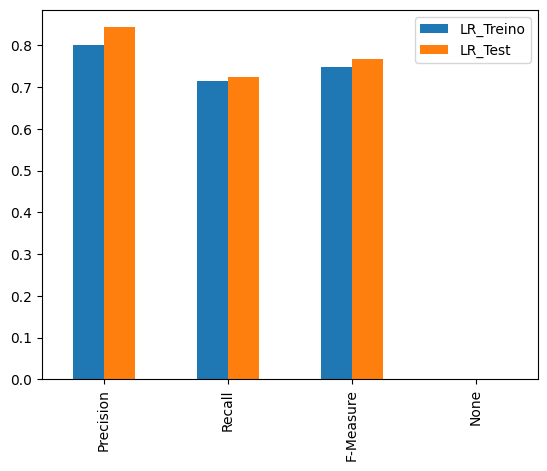

In [28]:
resultado_df.plot.bar()

Arvore de decisão

In [7]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_DT = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["DT_Treino"])
extracted_col = resultado_df_DT["DT_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_DT2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["DT_Test"])
extracted_col2 = resultado_df_DT2["DT_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

resultado_df

,LR_Treino,LR_Test,DT_Treino,DT_Test
Precision,0.801789,0.843351,1.0,0.820805
Recall,0.715221,0.725477,1.0,0.789271
F-Measure,0.747835,0.766585,1.0,0.803758
None,NaN,NaN,NaN,NaN


ADABOOST

In [8]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_RF = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["AB_Treino"])
extracted_col = resultado_df_RF["AB_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_RF2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["AB_Test"])
extracted_col2 = resultado_df_RF2["AB_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

resultado_df

,LR_Treino,LR_Test,DT_Treino,DT_Test,AB_Treino,AB_Test
Precision,0.801789,0.843351,1.0,0.820805,0.830912,0.846110
Recall,0.715221,0.725477,1.0,0.789271,0.828831,0.829970
F-Measure,0.747835,0.766585,1.0,0.803758,0.829866,0.837739
None,NaN,NaN,NaN,NaN,NaN,NaN


Random Forest

In [9]:
clf = RandomForestClassifier()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_RF = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["RF_Treino"])
extracted_col = resultado_df_RF["RF_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_RF2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["RF_Test"])
extracted_col2 = resultado_df_RF2["RF_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

resultado_df

,LR_Treino,LR_Test,DT_Treino,DT_Test,AB_Treino,AB_Test,RF_Treino,RF_Test
Precision,0.801789,0.843351,1.0,0.820805,0.830912,0.846110,1.0,0.850597
Recall,0.715221,0.725477,1.0,0.789271,0.828831,0.829970,1.0,0.816135
F-Measure,0.747835,0.766585,1.0,0.803758,0.829866,0.837739,1.0,0.831994
None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Gradiente Boosting

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(train_X, train_y)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df_GB = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["GB_Treino"])
extracted_col = resultado_df_GB["GB_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df_GB2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["GB_Test"])
extracted_col2 = resultado_df_GB2["GB_Test"]

resultado_df = resultado_df.join(extracted_col)
resultado_df = resultado_df.join(extracted_col2)

resultado_df

,LR_Treino,LR_Test,DT_Treino,DT_Test,AB_Treino,AB_Test,RF_Treino,RF_Test,GB_Treino,GB_Test
Precision,0.801789,0.843351,1.0,0.820805,0.830912,0.846110,1.0,0.850597,0.892591,0.856428
Recall,0.715221,0.725477,1.0,0.789271,0.828831,0.829970,1.0,0.816135,0.878510,0.834186
F-Measure,0.747835,0.766585,1.0,0.803758,0.829866,0.837739,1.0,0.831994,0.885361,0.844752
None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


P: 3 - Reporte precision, recall e f-measure no treino e validação. Há uma grande diferença de desempenho no treino/validação? Como você avalia os resultados? Justifique sua resposta. (10 pt.)

R: Sim há uma boa diferença, porém analisando os dados percebe-se que no treino os modelos DecisionTree e RandomForest no treino apontam 1.0 para precision, recall e f-score. Não levando em consideração este fato o modelo Gradient Boost, conforme grafico abaixo é o modelo que teve melhores indicadores (precision, recall, f-score) entre os modelos

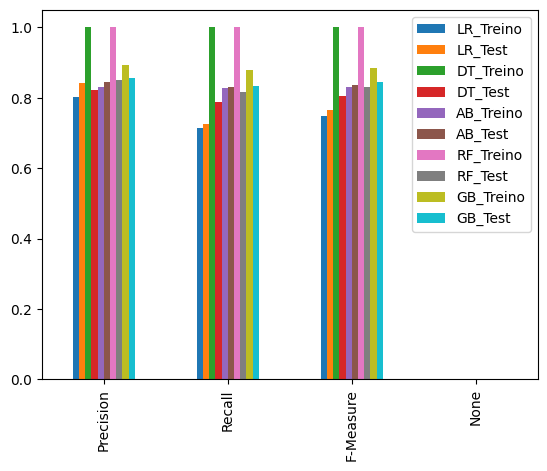

In [11]:
resultado_df.plot.bar()
plt.show()

4 - Interprete as saídas dos modelos. Quais atributos parecem ser mais importantes de acordo com cada modelo? (10 pts.)
5 - Envie seus melhores modelos conforme resultados nos dados de teste. Sugestões para melhorar o modelo: (10 pts.)
6 - Experimente outros modelos (e.g. SVM, RandomForests e GradientBoosting).
7 - Experimente balancear as classes,  caso estejam desbalanceadas.

Balanceamento das classes

Under-Sampling

0    809
1    809
dtype: int64


<AxesSubplot: ylabel='count'>

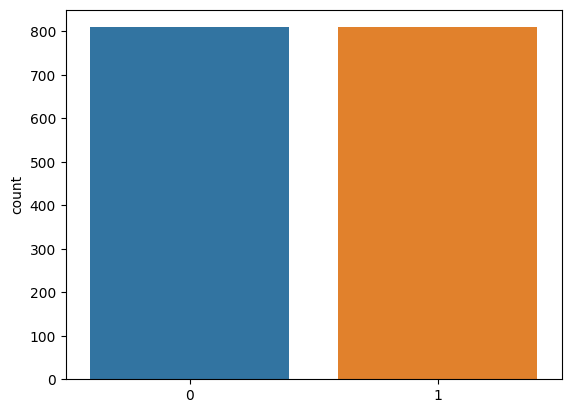

In [23]:
rus = RandomUnderSampler()
x_res, y_res = rus.fit_resample(train_X, train_y)
print(pd.Series(y_res).value_counts())
sns.countplot(x=y_res)

In [29]:
clf = LogisticRegression()
clf.fit(x_res, y_res)
y_pred_train = clf.predict(train_X)
y_pred_test = clf.predict(test_X)

res =  precision_recall_fscore_support(train_y, y_pred_train, average="macro")
resultado_df = pd.DataFrame(data = res, index= ["Precision", "Recall", "F-Measure","None"], columns=["LR_Treino"])
extracted_col = resultado_df["LR_Treino"]

res2 =  precision_recall_fscore_support(test_y, y_pred_test, average="macro")
resultado_df2 = pd.DataFrame(data = res2, index= ["Precision", "Recall", "F-Measure","None"], columns=["LR_Test"])
extracted_col2 = resultado_df2["LR_Test"]

resultado_df = resultado_df.join(extracted_col2)

resultado_df


c:\Users\gigi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,LR_Treino,LR_Test
Precision,0.707188,0.721036
Recall,0.873990,0.871773
F-Measure,0.736806,0.752656
None,NaN,NaN


<AxesSubplot: >

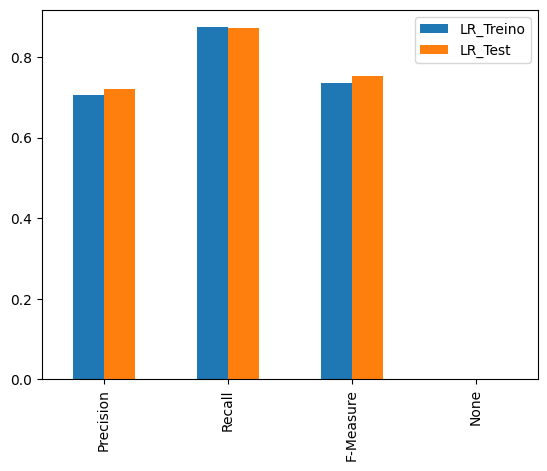

In [30]:
resultado_df.plot.bar()